In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
os.chdir('data')

In [3]:
# Load the dataset (assuming it's in the same directory as the notebook)
file_path = 'fungut_metadata.tsv'  # Adjust this if necessary
df = pd.read_csv(file_path, sep='\t')  # Use tab separator for .tsv files
df.set_index('ID')
df.head()

,ID,country_sample,state_sample,latitude_sample,longitude_sample,sex_sample,age_years_sample,height_cm_sample,weight_kg_sample,bmi_sample,diet_type_sample,ibd_sample,gluten_sample
0,ERR5327198,USA,TN,36.1,-86.8,female,67,152,41,17.75,Omnivore,I do not have this condition,No
1,ERR5327199,USA,DC,38.9,-77.1,male,55.0,182.0,79.0,23.73,Omnivore,I do not have this condition,I was diagnosed with gluten allergy (anti-glut...
2,ERR5327266,USA,VA,38.9,-77.1,female,28.0,175.0,61.0,19.94,Omnivore,I do not have this condition,I do not eat gluten because it makes me feel bad
3,ERR5327282,United Kingdom,Not provided,51.6,-0.2,female,26.0,166.0,60.0,21.77,Omnivore,I do not have this condition,No
4,ERR5327284,United Kingdom,Not provided,51.5,-0.2,female,25.0,173.0,59.0,20.01,Vegetarian but eat seafood,I do not have this condition,No


In [4]:
# Display column names and basic information about the dataset
print("\nColumn names and data types:")
df.info()

# Display the data types of each column explicitly
print("\nData types of each column:")
print(df.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
display(df.describe())


Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                150 non-null    object
 1   country_sample    150 non-null    object
 2   state_sample      150 non-null    object
 3   latitude_sample   150 non-null    object
 4   longitude_sample  150 non-null    object
 5   sex_sample        150 non-null    object
 6   age_years_sample  150 non-null    object
 7   height_cm_sample  150 non-null    object
 8   weight_kg_sample  150 non-null    object
 9   bmi_sample        150 non-null    object
 10  diet_type_sample  150 non-null    object
 11  ibd_sample        150 non-null    object
 12  gluten_sample     150 non-null    object
dtypes: object(13)
memory usage: 15.4+ KB

Data types of each column:
ID                  object
country_sample      object
state_sample        object
latitude_sample     obje

,ID,country_sample,state_sample,latitude_sample,longitude_sample,sex_sample,age_years_sample,height_cm_sample,weight_kg_sample,bmi_sample,diet_type_sample,ibd_sample,gluten_sample
count,150,150,150,150,150,150,150,150,150,150,150,150,150
unique,150,8,30,86,81,4,64,47,70,135,6,4,5
top,ERR5327198,United Kingdom,Not provided,51.5,145.0,male,55.0,180.0,63.0,Not provided,Omnivore,I do not have this condition,No
freq,1,54,58,14,5,79,6,15,8,3,118,130,113


In [5]:
# Convert columns to their respective data types
df['latitude_sample'] = pd.to_numeric(df['latitude_sample'], errors='coerce')   # Convert to float
df['longitude_sample'] = pd.to_numeric(df['longitude_sample'], errors='coerce')  # Convert to float
df['age_years_sample'] = pd.to_numeric(df['age_years_sample'], errors='coerce')  # Convert to float
df['height_cm_sample'] = pd.to_numeric(df['height_cm_sample'], errors='coerce')  # Convert to float
df['weight_kg_sample'] = pd.to_numeric(df['weight_kg_sample'], errors='coerce')  # Convert to float
df['bmi_sample'] = pd.to_numeric(df['bmi_sample'], errors='coerce')              # Convert to float

# Optional: Convert categorical columns to category type for optimization (optional)
df['country_sample'] = df['country_sample'].astype('category')
df['state_sample'] = df['state_sample'].astype('category')
df['sex_sample'] = df['sex_sample'].astype('category')
df['diet_type_sample'] = df['diet_type_sample'].astype('category')
df['ibd_sample'] = df['ibd_sample'].astype('category')
df['gluten_sample'] = df['gluten_sample'].astype('category')

# Display the updated data types
print("\nUpdated data types:")
print(df.dtypes)


Updated data types:
ID                    object
country_sample      category
state_sample        category
latitude_sample      float64
longitude_sample     float64
sex_sample          category
age_years_sample     float64
height_cm_sample     float64
weight_kg_sample     float64
bmi_sample           float64
diet_type_sample    category
ibd_sample          category
gluten_sample       category
dtype: object


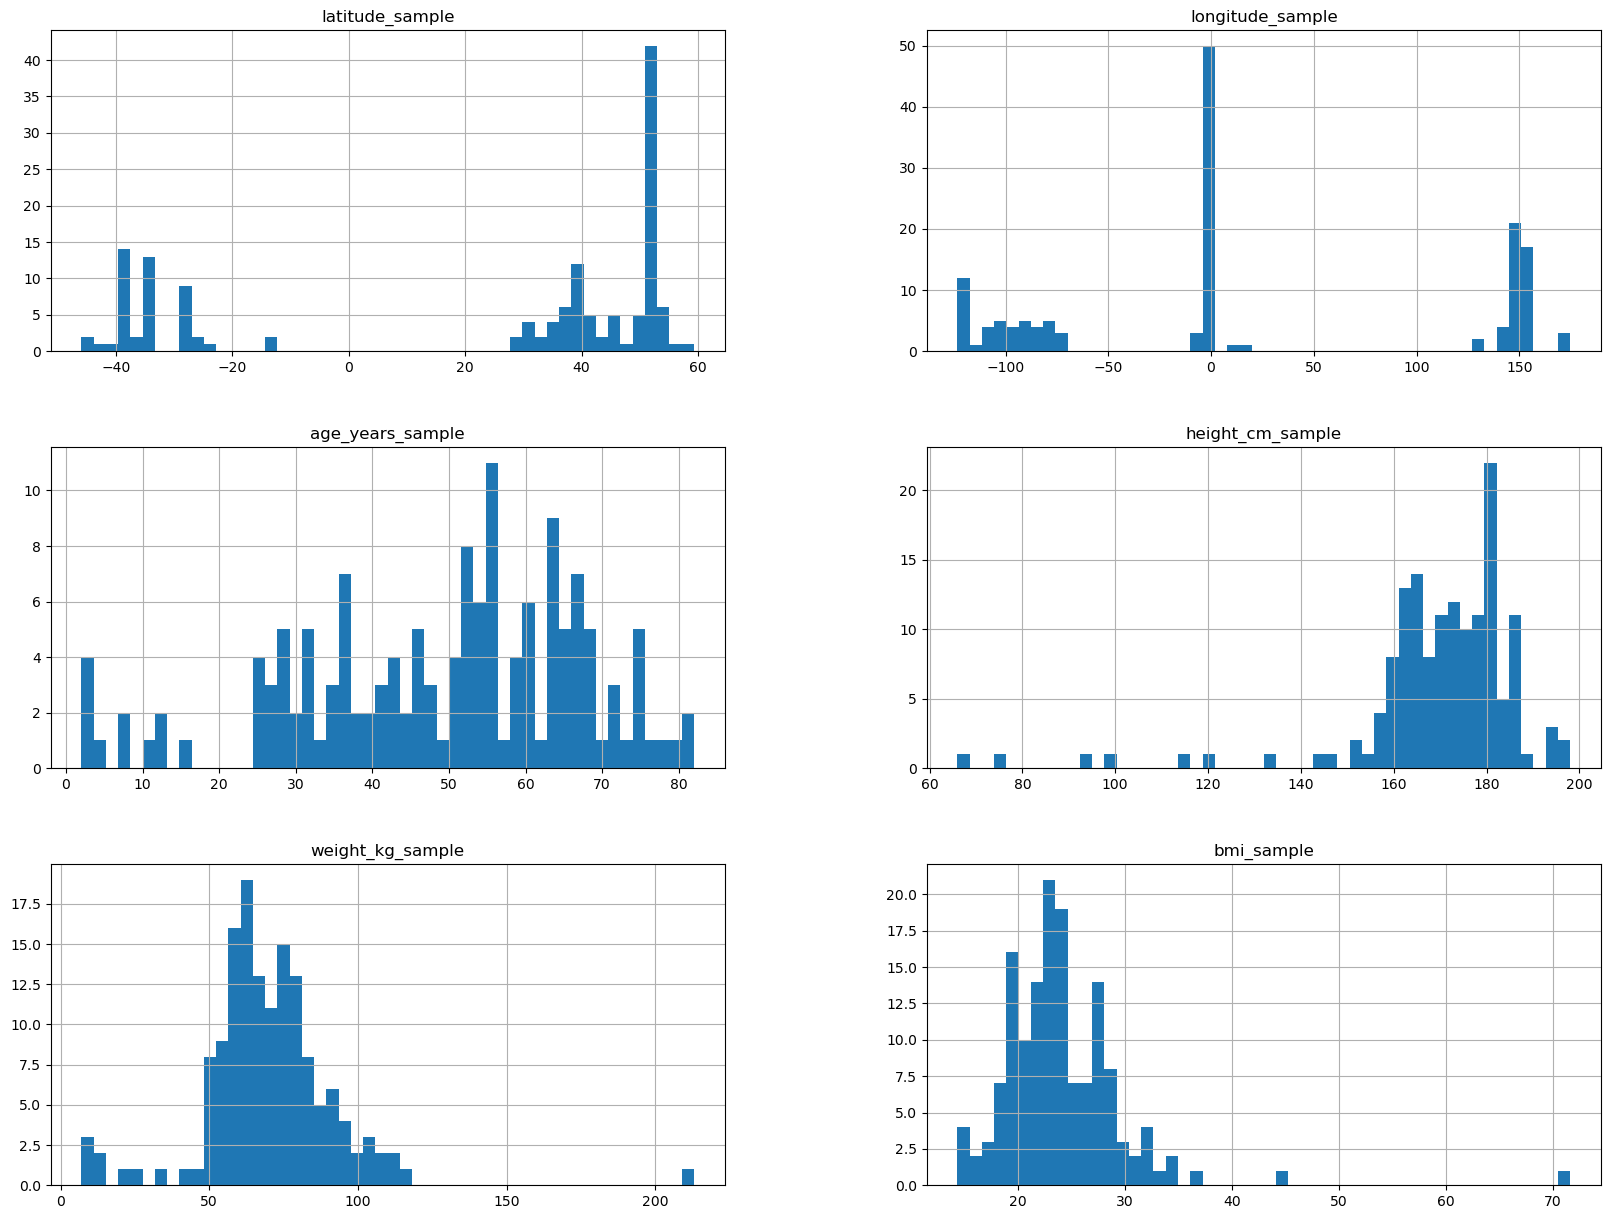

In [6]:
# Show distribution of data for numerical columns (optional)
df.hist(bins=50, figsize=(20,15))
plt.show()

<Figure size 1200x800 with 0 Axes>

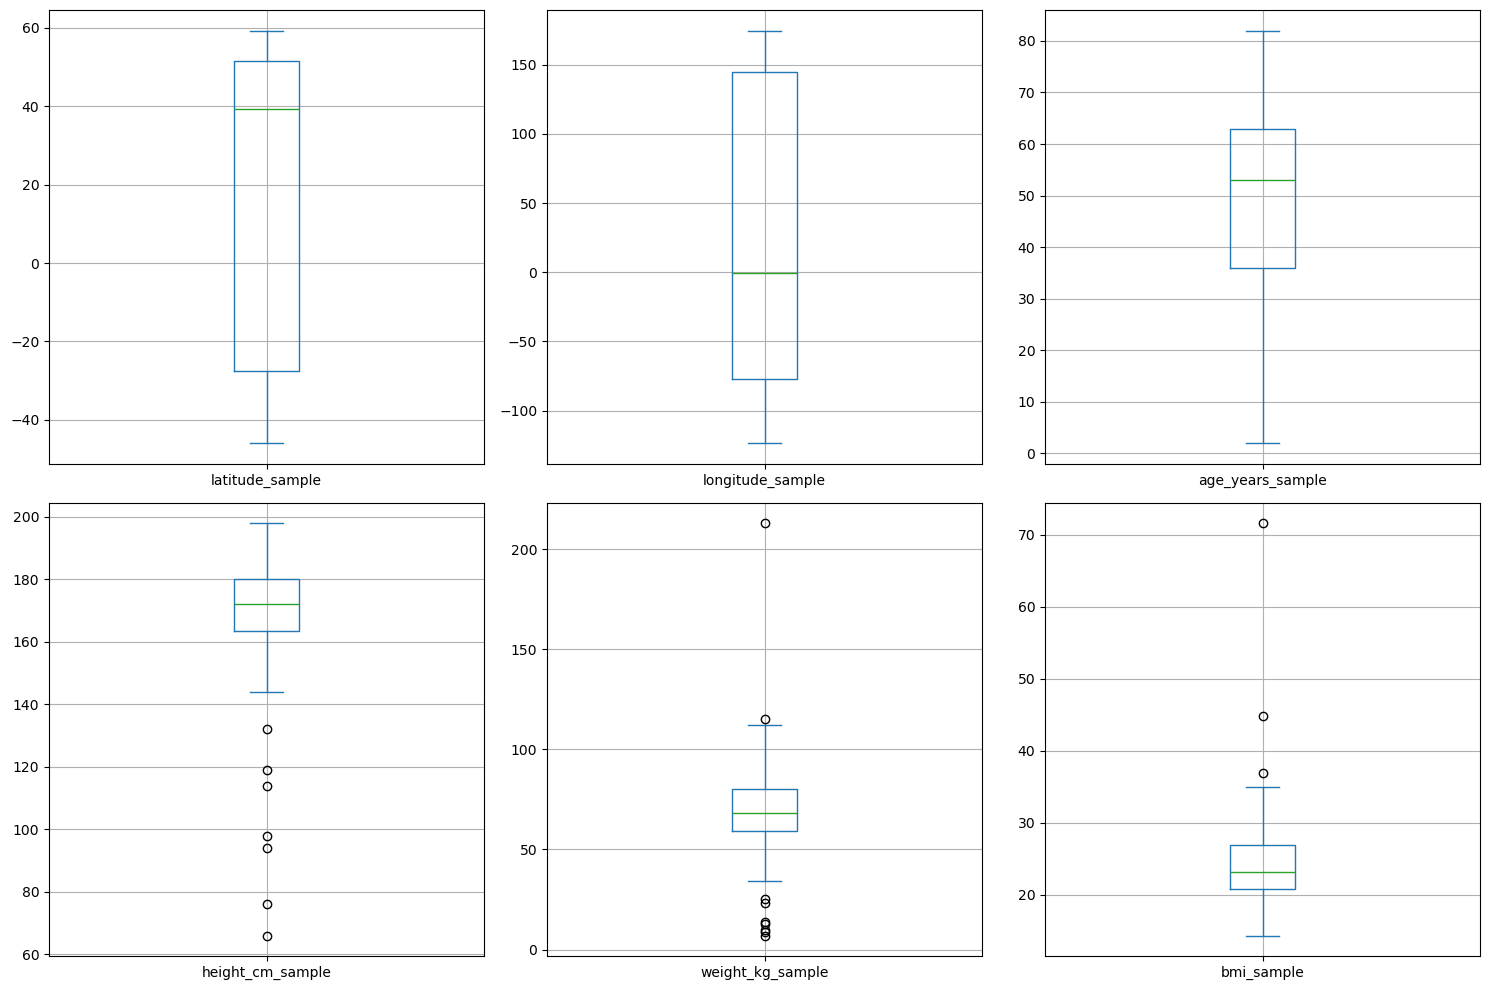

In [10]:
numerical_cols = ['latitude_sample', 'longitude_sample', 'age_years_sample', 
                  'height_cm_sample', 'weight_kg_sample', 'bmi_sample']

# Create boxplots for numerical columns
plt.figure(figsize=(12, 8))
df[numerical_cols].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10), grid=True)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

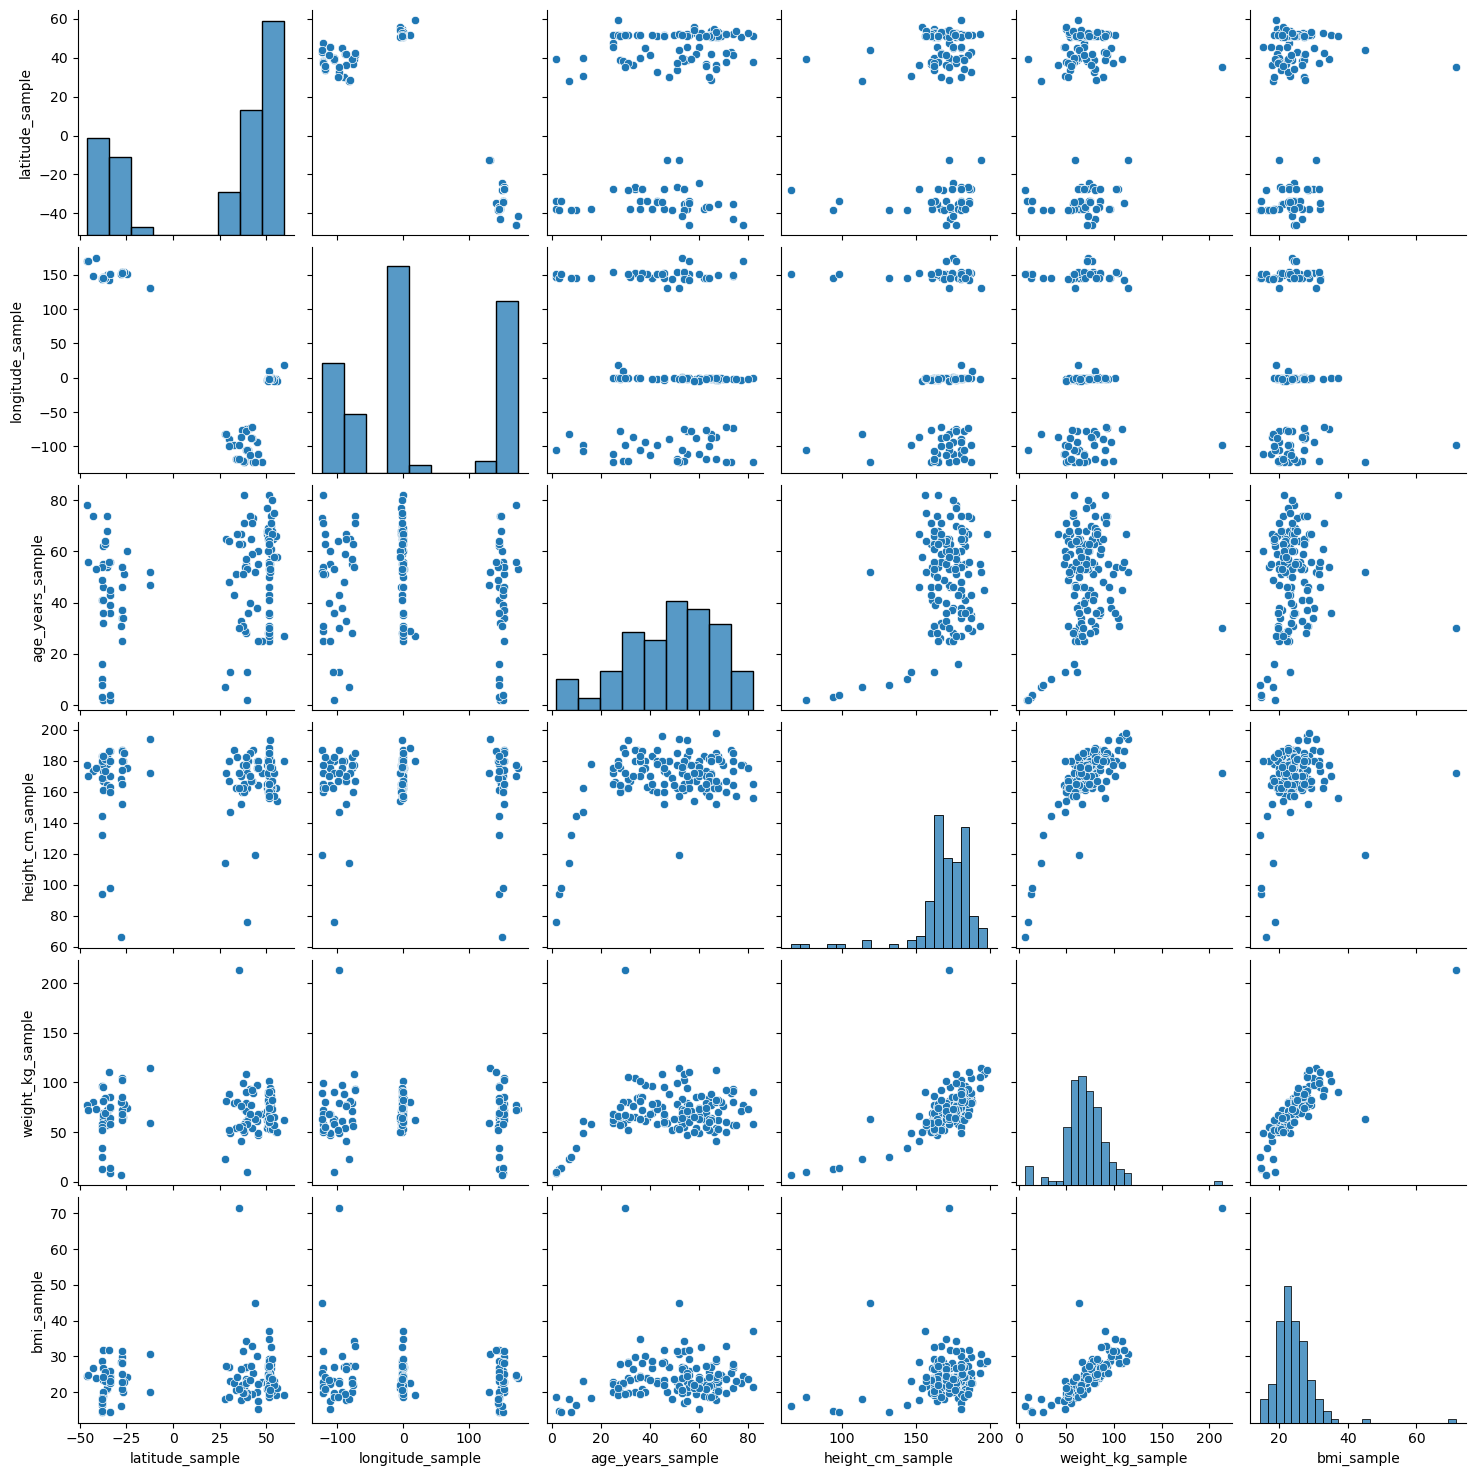

In [11]:
# Create a pairplot for numerical data
sns.pairplot(df[numerical_cols])
plt.show()

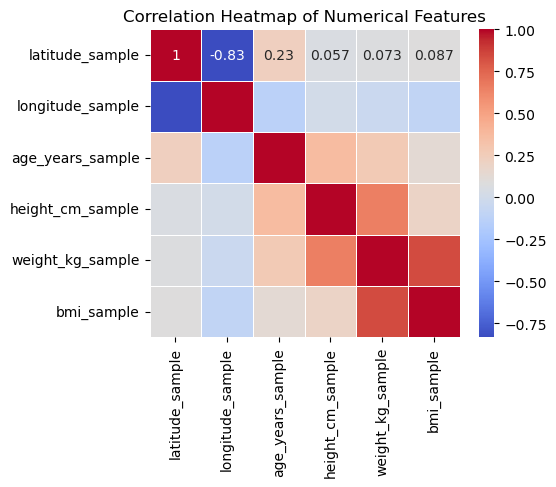

In [16]:
# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_val

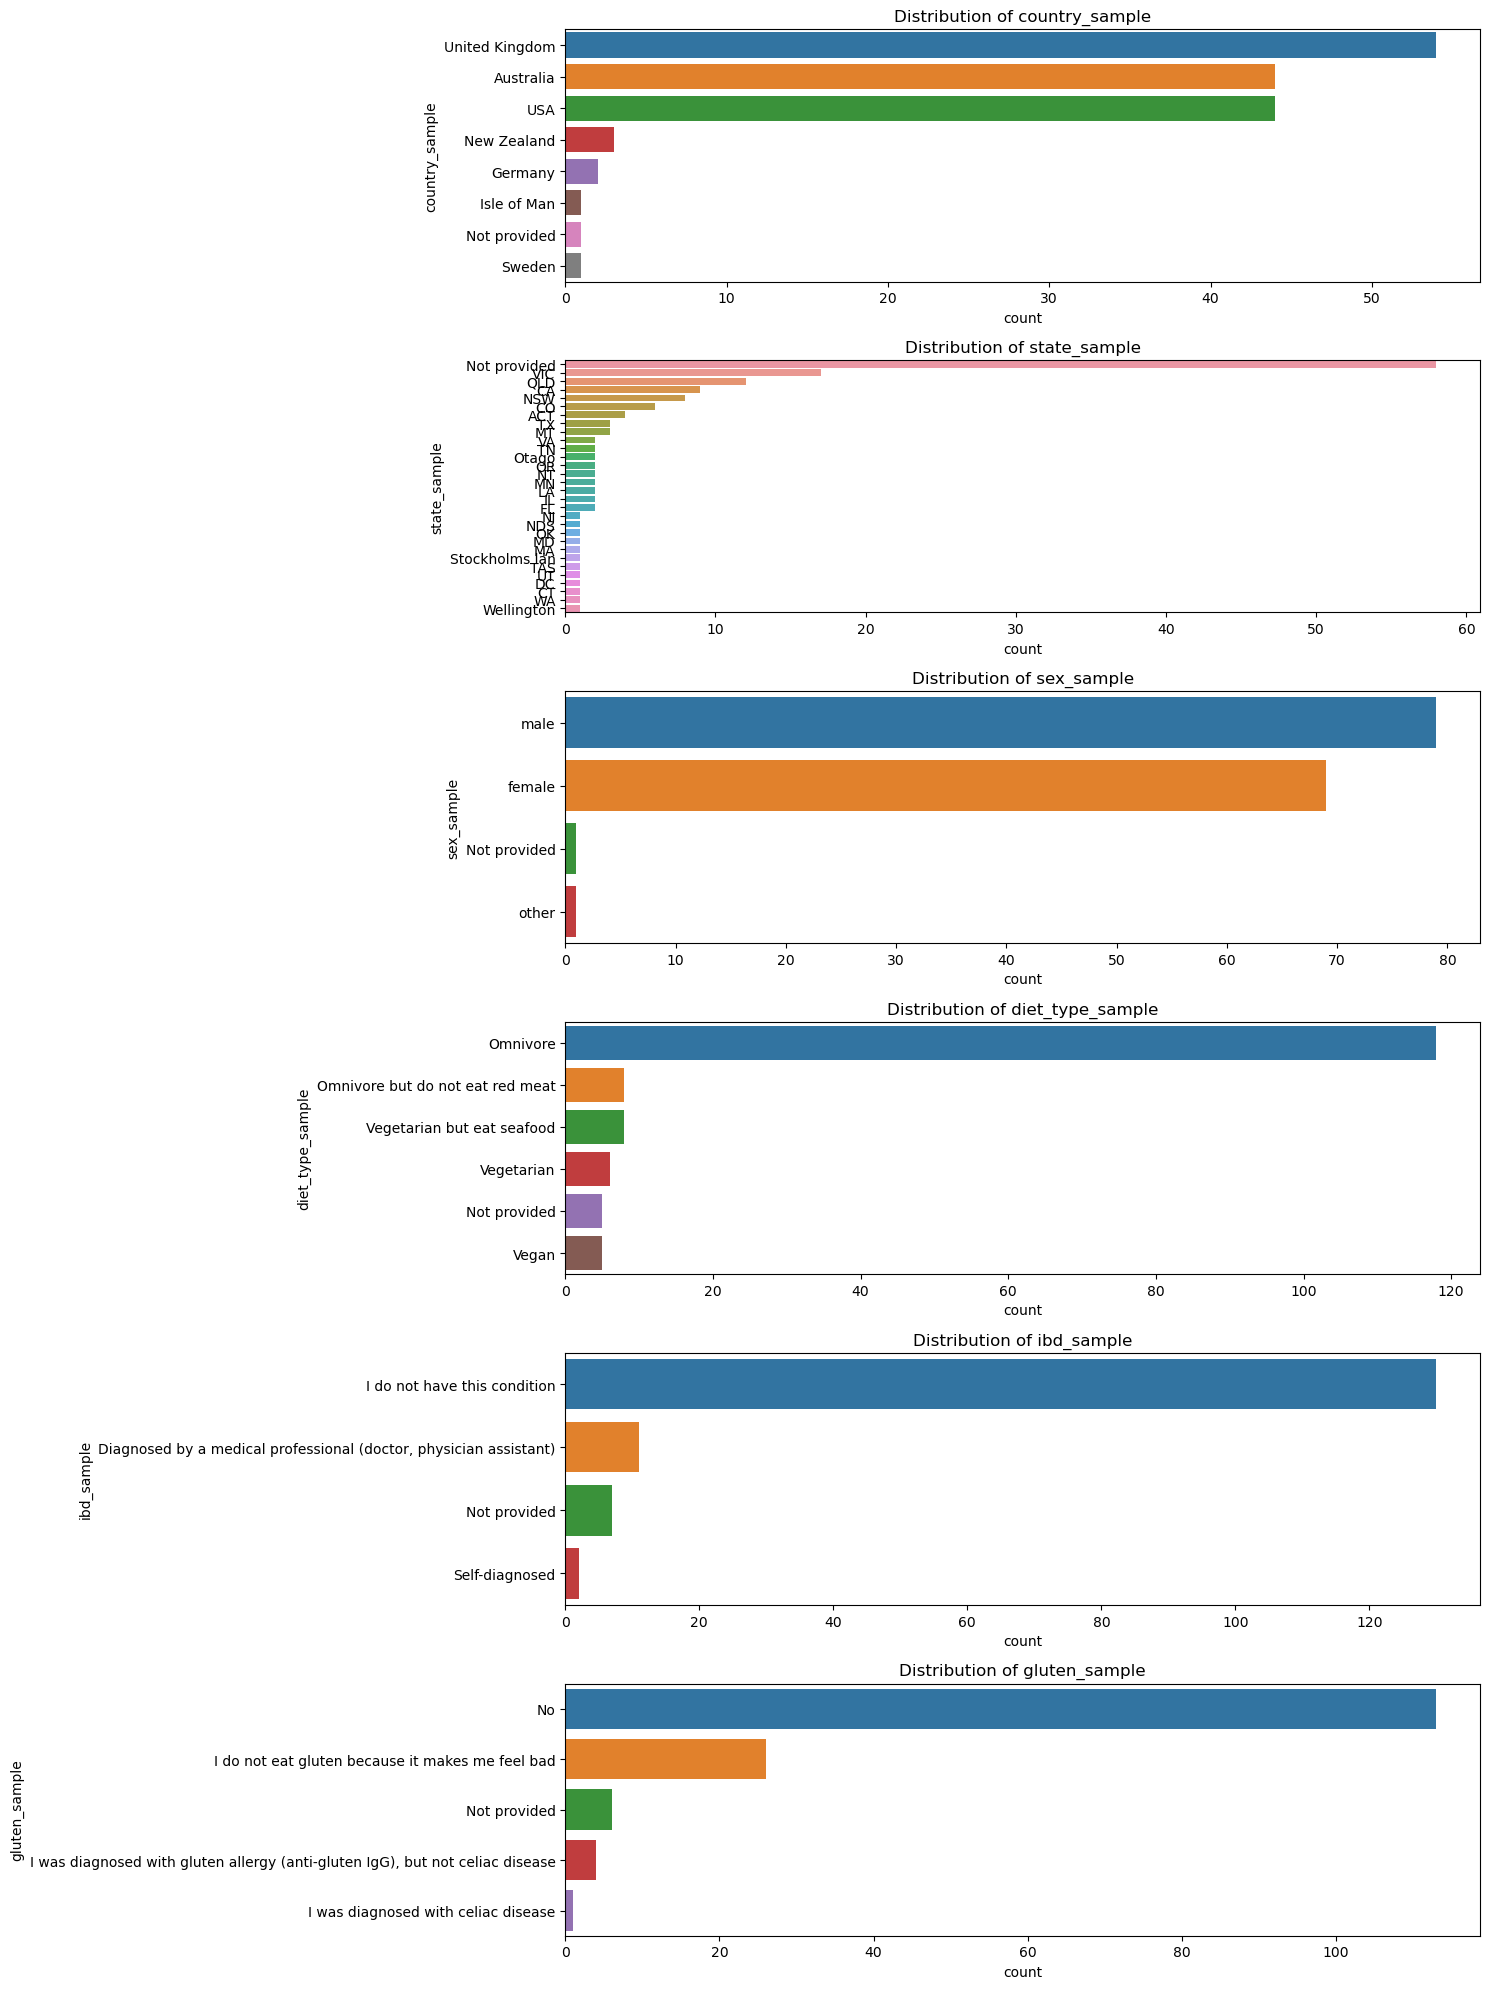

In [18]:
# List of categorical columns
categorical_cols = ['country_sample', 'state_sample', 'sex_sample', 'diet_type_sample', 'ibd_sample', 'gluten_sample']

# Create bar plots for each categorical column
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


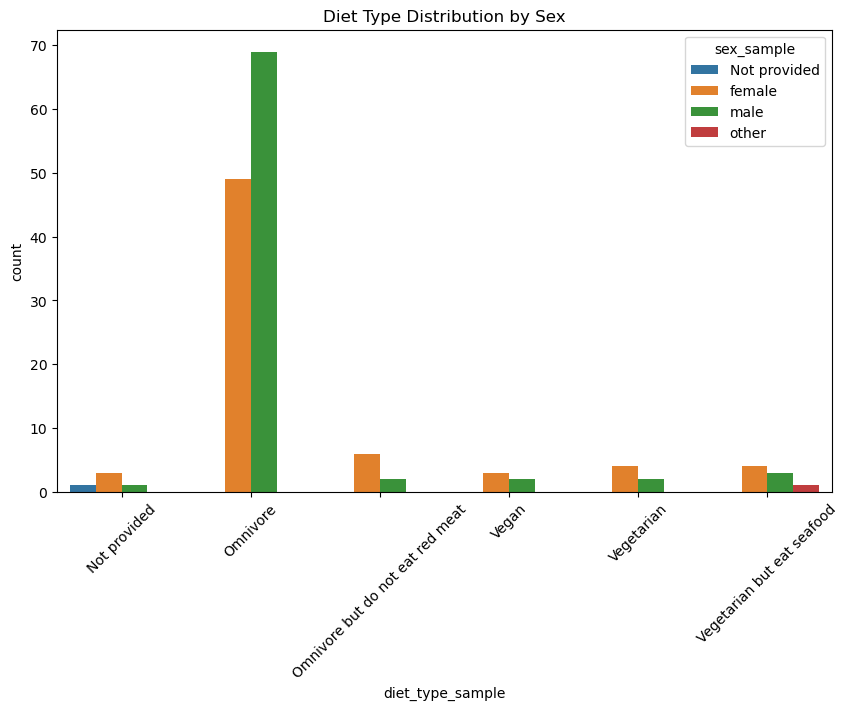

In [19]:
# Grouped bar plot for diet_type_sample and sex_sample
plt.figure(figsize=(10, 6))
sns.countplot(x='diet_type_sample', hue='sex_sample', data=df)
plt.title('Diet Type Distribution by Sex')
plt.xticks(rotation=45)
plt.show()


/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


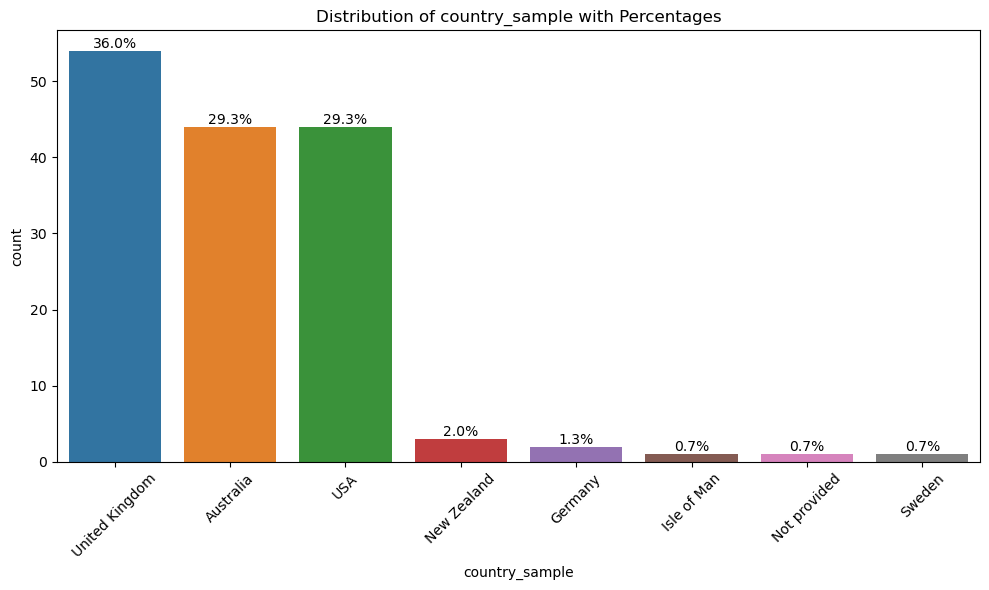

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


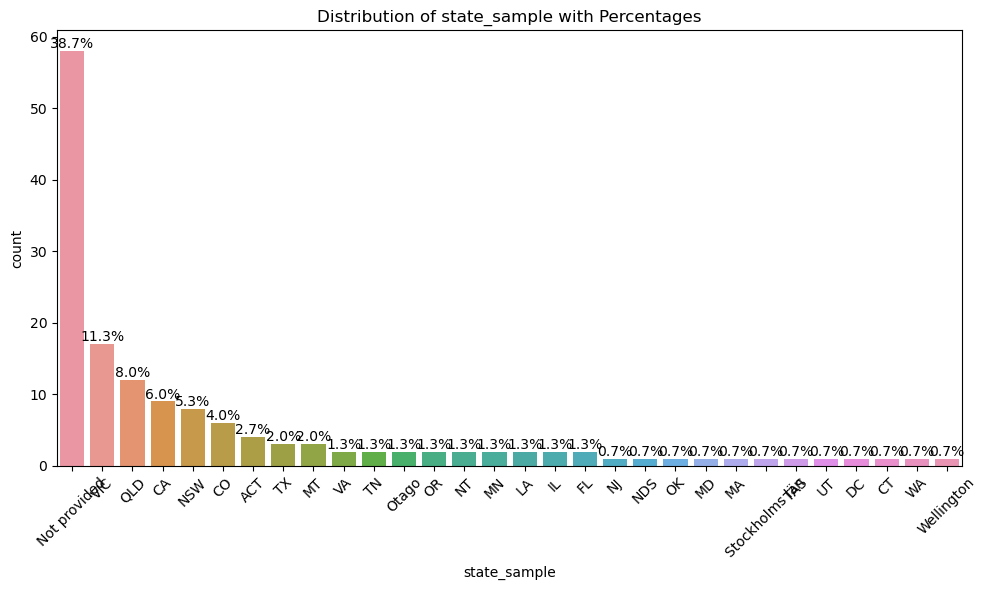

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


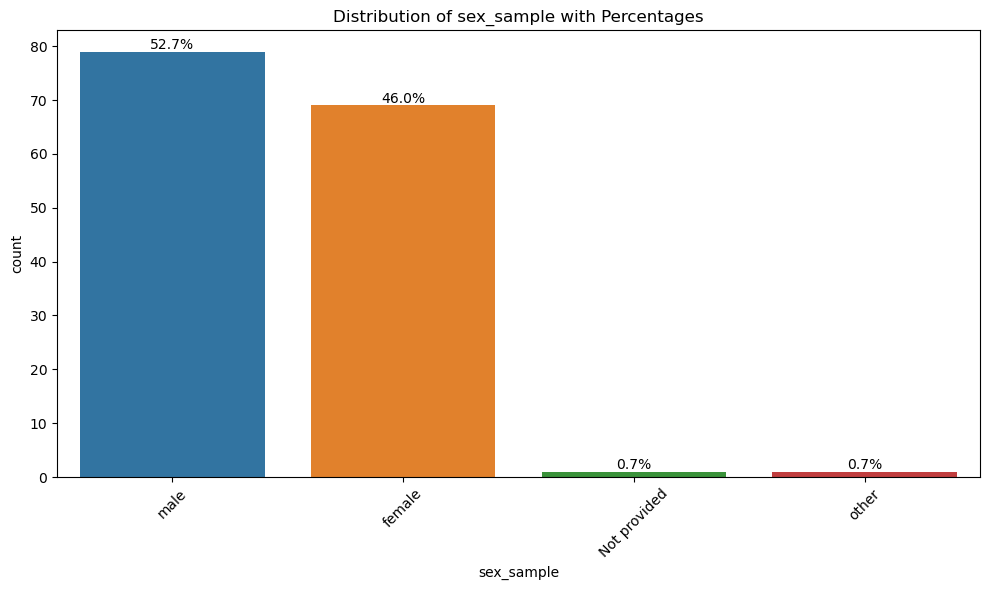

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


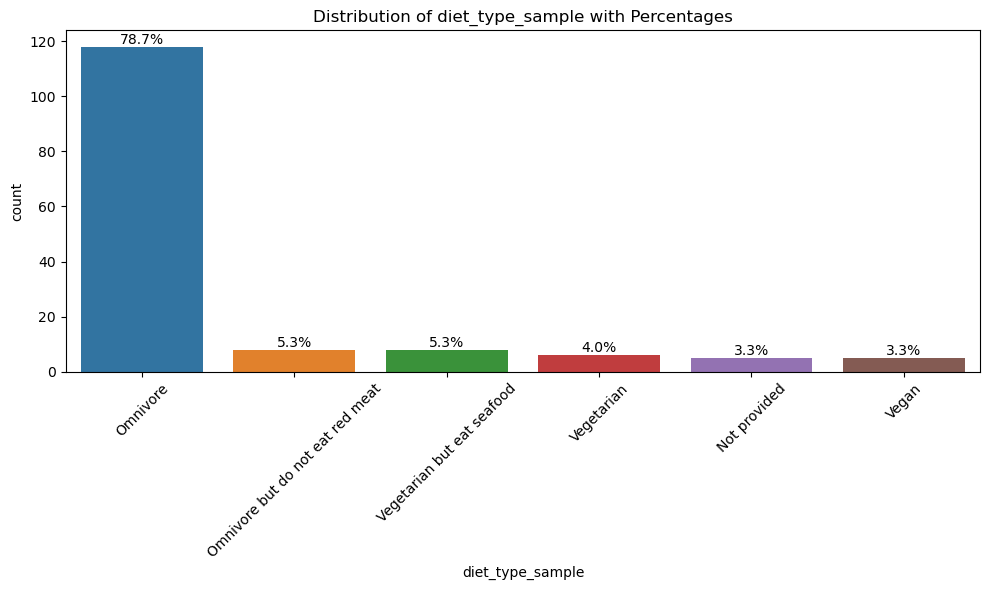

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


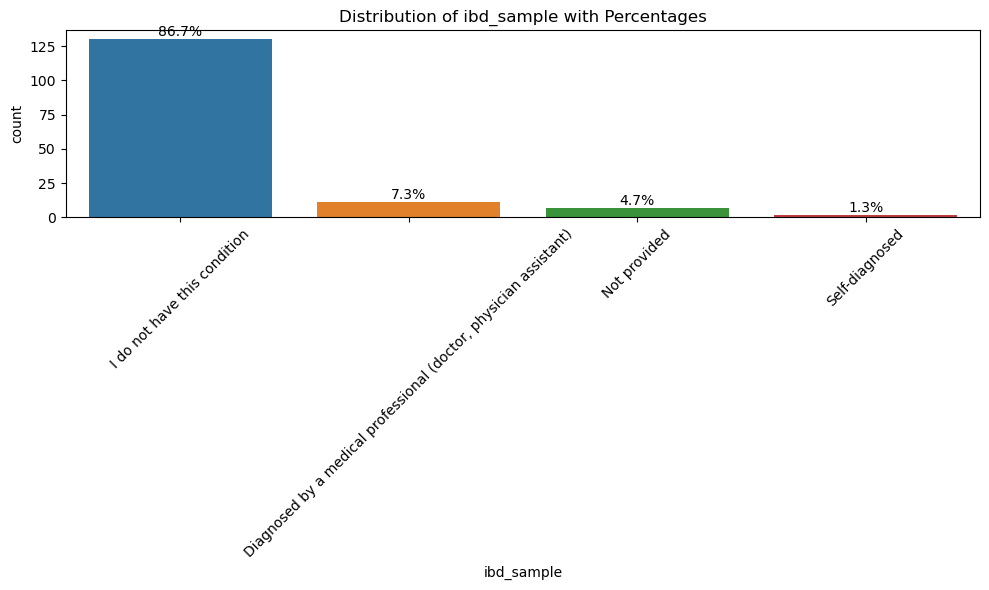

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


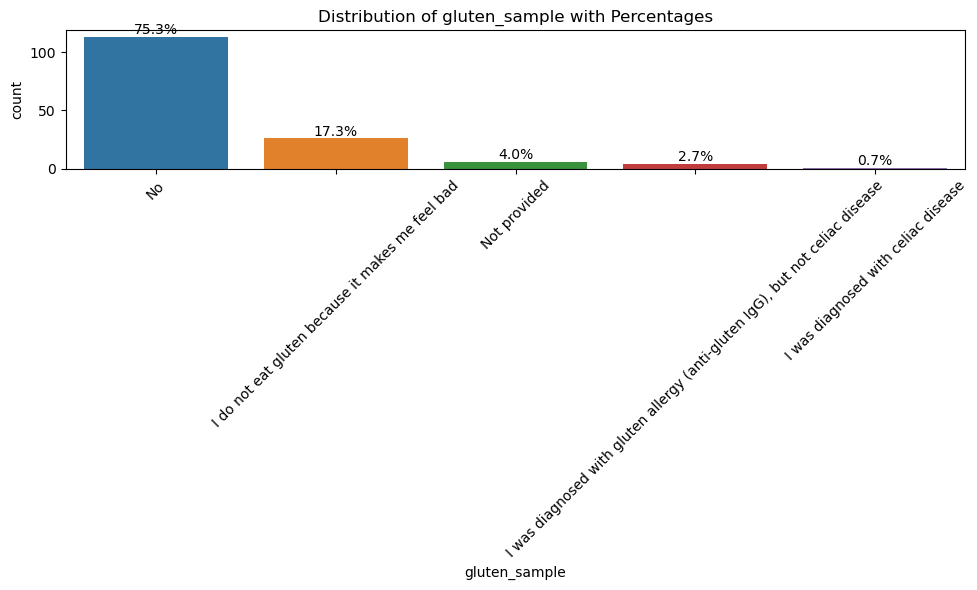

In [20]:
# Bar plot with percentage annotations
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=df[col], order=df[col].value_counts().index)
    total = len(df[col])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.title(f'Distribution of {col} with Percentages')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
